## Importando base

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.under_sampling import NearMiss

In [5]:
file_path = "/content/drive/MyDrive/Colab Notebooks/base.pronta.csv"

In [6]:
df = pd.read_csv(file_path)

### Testando Base

In [7]:
df.head(2)

,Unnamed: 0,age,workclass,fnlwgt,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,result
0,0,39,6,77516,13,5,1,2,5,1,2174,0,40,39,1
1,1,50,5,83311,13,3,4,1,5,1,0,0,13,39,1


## Random Forest


Atributos e rótulos

In [8]:
X = df[['age', 'workclass', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry']]
y = df['result']

Balancear base

In [9]:
df.result.value_counts()

1    22654
2     7508
Name: result, dtype: int64

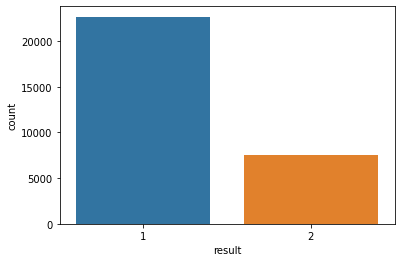

In [10]:
ax = sns.countplot(x="result", data=df)

In [11]:
nr = NearMiss()

In [12]:
X, y = nr.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


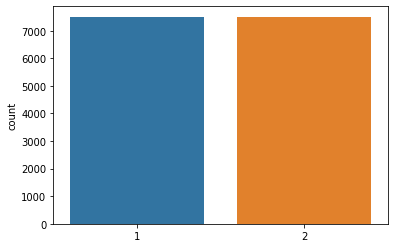

In [13]:
ax = sns.countplot(x=y)

Treino e Teste

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11262, 12), (3754, 12), (11262,), (3754,))

Validações

In [19]:
rdf = RandomForestClassifier(n_estimators=500)

In [20]:
y_pred = cross_val_predict(rdf, X, y, cv=10)
score = cross_val_score(rdf, X, y, cv=10)

In [21]:
y_pred

array([2, 2, 2, ..., 2, 1, 2])

In [22]:
score

array([0.4494008 , 0.57123835, 0.66378162, 0.69573901, 0.76564581,
       0.77696405, 0.81612258, 0.81812125, 0.82611592, 0.81279147])

Matriz de confusão

In [23]:
matconf = confusion_matrix(y, y_pred)

In [24]:
print(matconf)

[[5182 2326]
 [1898 5610]]


Construção dos valores

In [25]:
vn = matconf[0,0]
fn = matconf[1,0]
fp = matconf[0,1]
vp = matconf[1,1]

In [26]:
acuracia = (vp + vn) / (vp + vn + fp + fn)*100
sensibilidade = vp / (vn + fn) * 100
especificidade = vn / (vn + fp) * 100
t_erro = fp / (vn + fp) * 100

In [27]:
print("Acuracia", int(acuracia), "%")
print("Sensibilidade", int(sensibilidade), "%")
print("Especificidade", int(especificidade), "%")
print("Taxa de Erro", int(t_erro), "%")

Acuracia 71 %
Sensibilidade 79 %
Especificidade 69 %
Taxa de Erro 30 %
